<a href="https://colab.research.google.com/github/lisosoma/Deep-learning-courses/blob/main/hw3_dls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('../input/advanced-dls-spring-2021/train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на случайные строчки из датасета

In [ ]:
np.random.seed(42)

In [ ]:
data.sample(n=7)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1942,39,50.75,2011.4,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1859,52,79.20,4016.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,0


In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как видно, в данных нет nan'ов. Но числовой признак `TotalSpent` почему-то имеет тип `object`. Посмотрим, какие значения хранятся в `TotalSpent`

In [ ]:
data_TotalSpent = data.TotalSpent.value_counts().sort_index()
data_TotalSpent.head()

          9
100.2     1
100.25    1
100.35    1
100.4     1
Name: TotalSpent, dtype: int64

Видим, что в первой строчке отсортированной серии индексом является строка (видимо, с табуляциями/пробелами). Посмотрим, что это за строка

In [ ]:
data_TotalSpent.index[0]

' '

Получили строку, содержащую пробел. Заменим этот пробел на среднее значение `TotalSpent`, чтобы избавиться от этого пропуска в дынных

In [ ]:
mean_TotalSpent = data[~(data['TotalSpent'] == ' ')]['TotalSpent'].astype(float).mean()
data.loc[data[(data['TotalSpent'] == ' ')].index, 'TotalSpent'] = mean_TotalSpent
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как видим, теперь тип данных для `TotalSpent` это `float`. Мы избавились от пропусков в данных, заменив их средним и преобразовали тип (из строкового в число с плавающей точкой), чтобы далее не возникло проблем с построением графиков.

Посмотрим уникальные значения категориальных признаков.

In [ ]:
d = {}
for col in data[cat_cols].columns:
    d[col] = list(set(data[col]))
d

{'Sex': ['Female', 'Male'],
 'IsSeniorCitizen': [0, 1],
 'HasPartner': ['No', 'Yes'],
 'HasChild': ['No', 'Yes'],
 'HasPhoneService': ['No', 'Yes'],
 'HasMultiplePhoneNumbers': ['No', 'Yes', 'No phone service'],
 'HasInternetService': ['No', 'DSL', 'Fiber optic'],
 'HasOnlineSecurityService': ['No', 'No internet service', 'Yes'],
 'HasOnlineBackup': ['No', 'No internet service', 'Yes'],
 'HasDeviceProtection': ['No', 'No internet service', 'Yes'],
 'HasTechSupportAccess': ['No', 'No internet service', 'Yes'],
 'HasOnlineTV': ['No', 'No internet service', 'Yes'],
 'HasMovieSubscription': ['No', 'No internet service', 'Yes'],
 'HasContractPhone': ['One year', 'Month-to-month', 'Two year'],
 'IsBillingPaperless': ['No', 'Yes'],
 'PaymentMethod': ['Credit card (automatic)',
  'Bank transfer (automatic)',
  'Electronic check',
  'Mailed check']}

В категориальных признаках пропусков нет

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Выделим отдельно числовые признаки

In [ ]:
data_num = data[num_cols]
data_num.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45


In [ ]:
import seaborn as sns

sns.set_theme()

In [ ]:
# функция для отрисовки графиков
def show(graphic):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    for col, row in zip(data_num.columns, ax):
        row.set_title(col)
        if graphic == 'hist':
            row.hist(data_num[col])
        elif graphic == 'boxplot':
            row.boxplot(data_num[col])

Построим гистограммы

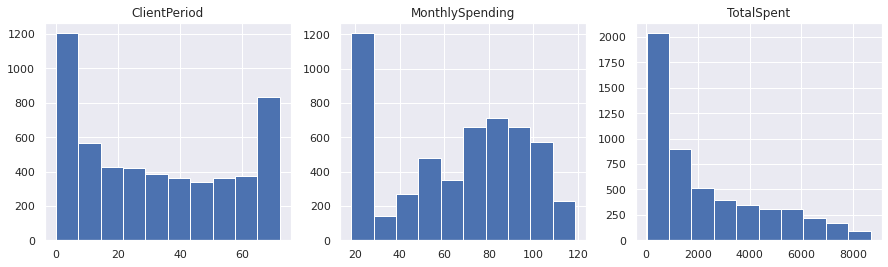

In [ ]:
show('hist')

Возможно, для TotalSpent лучше воспользоваться `RobustScaler`

Построим ящики с усами

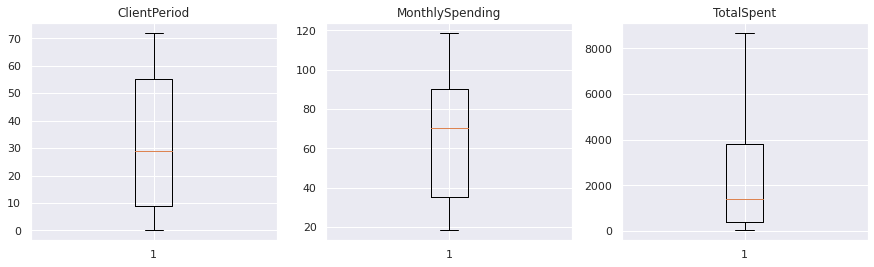

In [ ]:
show('boxplot')

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

Выделим категориальные признаки

In [ ]:
data_cat = data[cat_cols]
data_cat.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [ ]:
# функция для отрисовки графиков
def show_cat(graphic):
    columns = np.array(data_cat.columns).reshape(4, 4)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))
    for names, row in zip(columns, ax):
        for name, col in zip(names, row):
            x = data_cat[name].value_counts().index
            y = data_cat[name].value_counts()
            if graphic == 'bar':
                col.bar(x, y)
                plt.xticks(rotation=-15)
            elif graphic == 'pie':
                col.pie(y, labels=x)
            col.set_title(name)

Построим круговые диаграммы

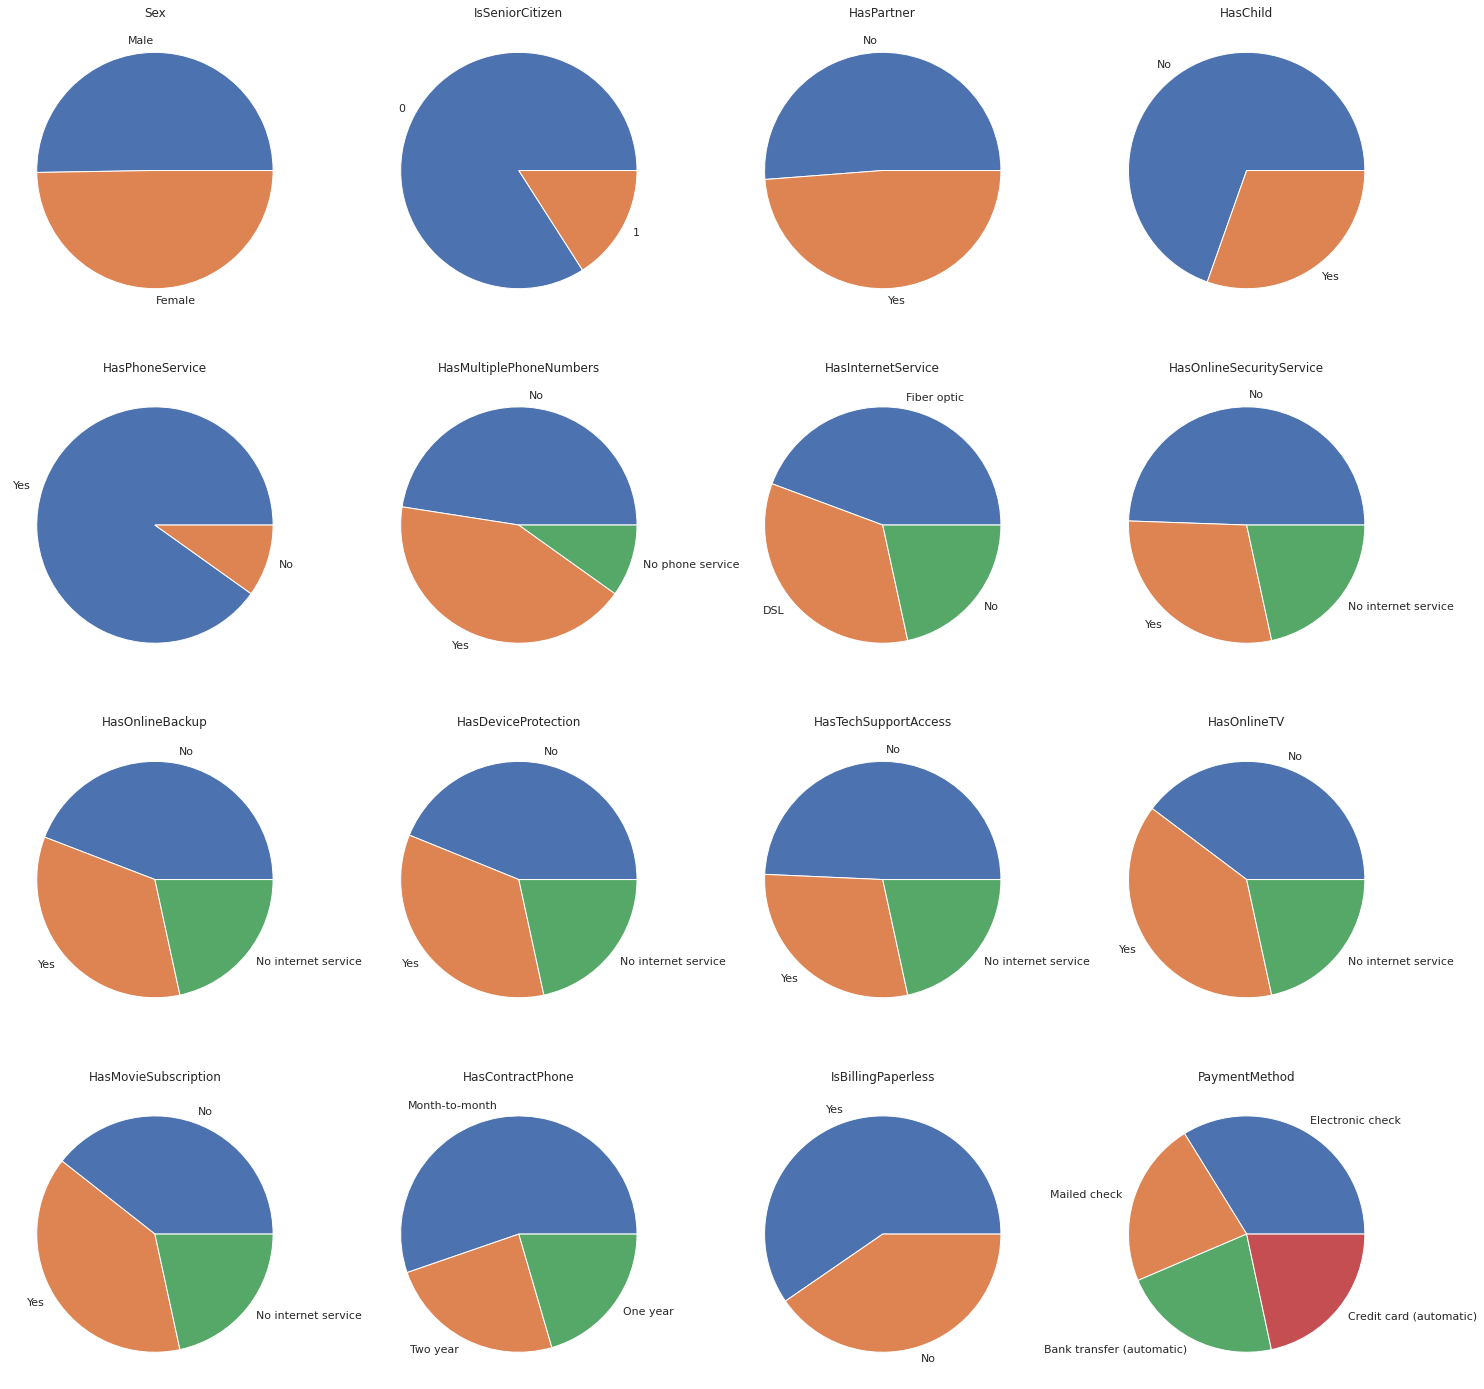

In [ ]:
show_cat('pie')

Построим гистограммы

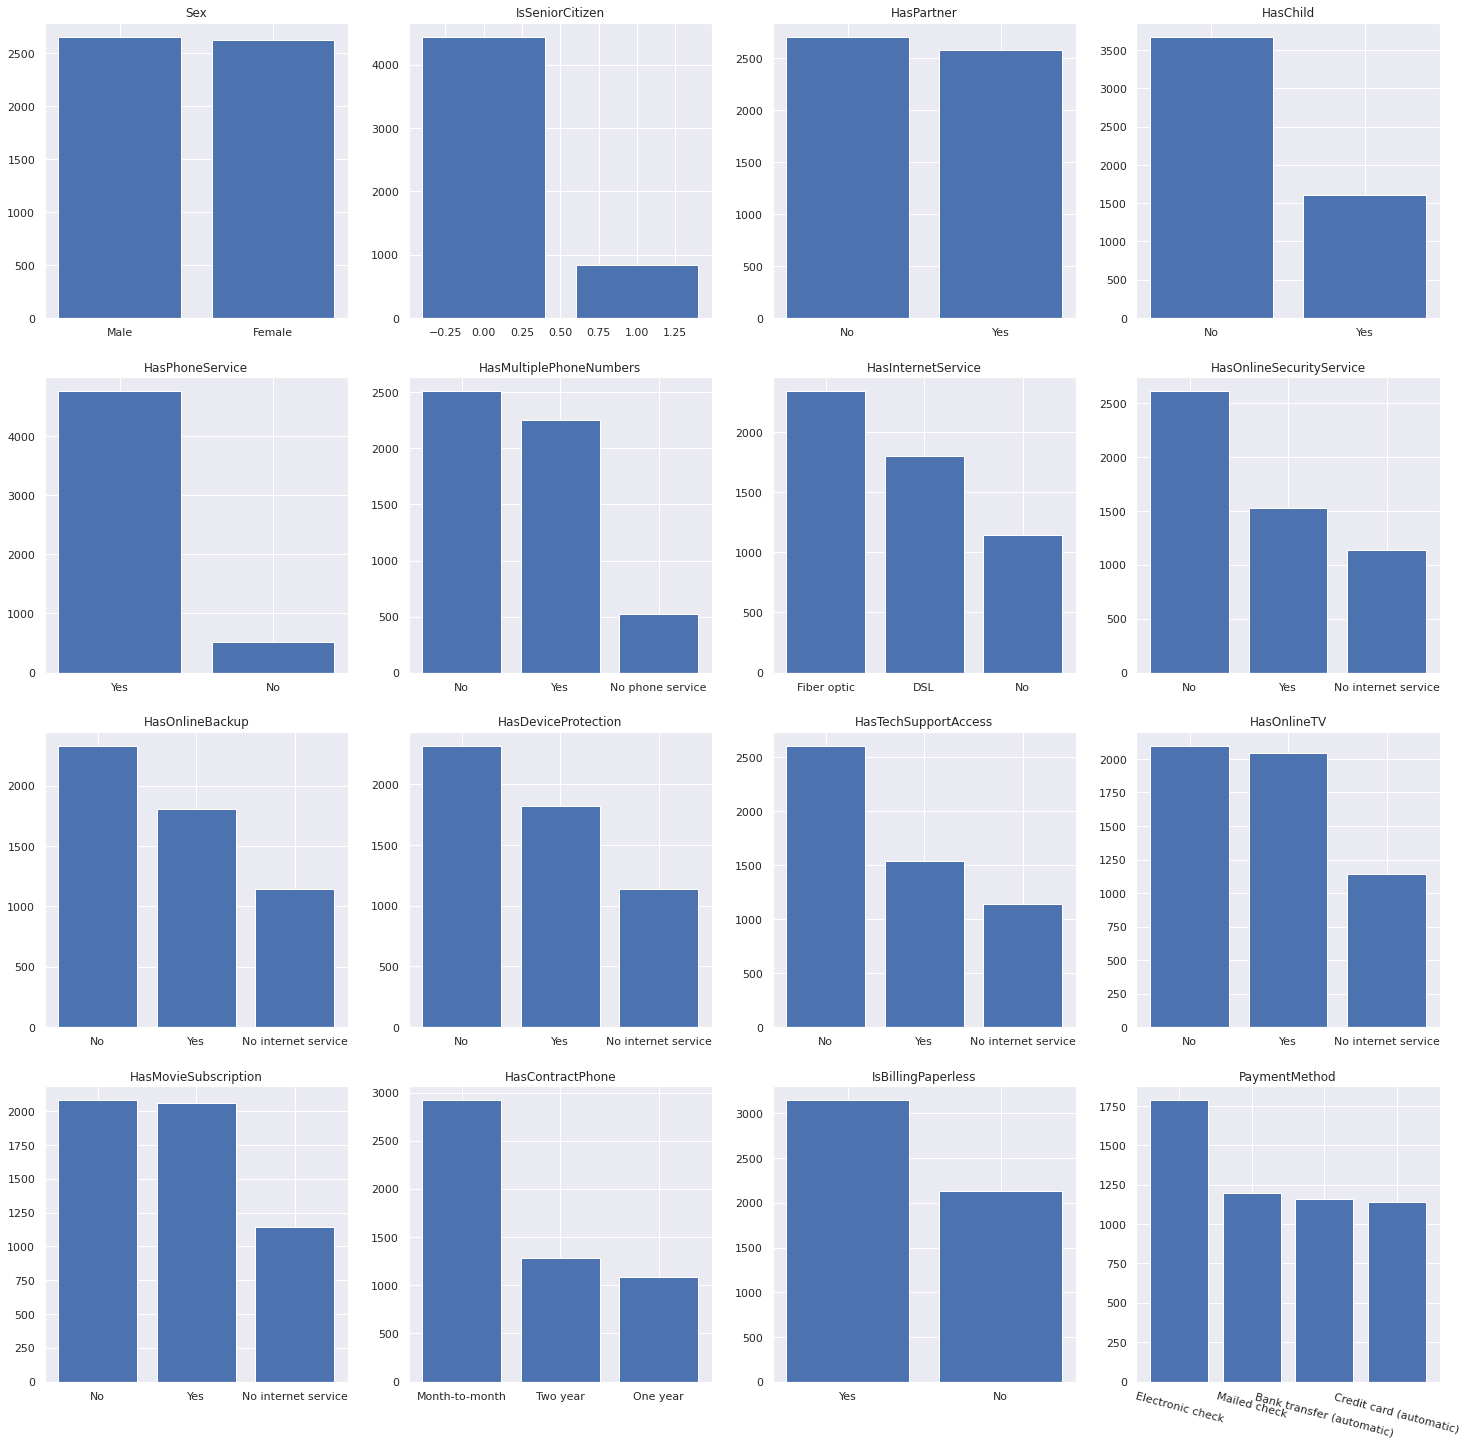

In [ ]:
show_cat('bar')

Распределение целевой переменной

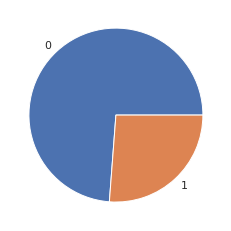

In [ ]:
plt.pie(data[target_col].value_counts(), labels=data[target_col].value_counts().index)
plt.show()

Выраженного дисбаланса классов нет

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Пстроим также корреляционную матрицу для числовых признаков, чтобы посмотреть, как они влияют на целевую переменную. Добавим к данным метки

In [ ]:
data_num_target = pd.concat([data_num, data[['Churn']]], axis=1)

Посмотрим на корреляцию

In [ ]:
corr = data_num_target.corr()
corr.style.background_gradient()

,ClientPeriod,MonthlySpending,TotalSpent,Churn
ClientPeriod,1.000000,0.249414,0.825103,-0.350640
MonthlySpending,0.249414,1.000000,0.651510,0.184769
TotalSpent,0.825103,0.651510,1.000000,-0.201233
Churn,-0.350640,0.184769,-0.201233,1.000000


Как видим, `TotalSpent` и `ClientPeriod` сильно коррелируют между собой. Возможно, это пригодится при дальнейшем исследовании.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

Попробуем вариант с разделением на train/valid 

Сначала предобработаем данные 

In [ ]:
# здесь идет преобразование категориальных признаков
data_cat_le = data_cat.apply(LabelEncoder().fit_transform)
encoder = OneHotEncoder()
data_cat_ohe = encoder.fit_transform(data_cat_le)
column_name = encoder.get_feature_names_out(data_cat.columns)
one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(data_cat_ohe, columns=column_name)

# далее сделаем RobustScaler для TotalSpent
transformer = RobustScaler().fit(data_num[['TotalSpent']])
data_num_rub = transformer.transform(data_num[['TotalSpent']])
rub_frame = pd.DataFrame(data_num_rub, columns=['TotalSpent'])

# и стандартизируем данные для ClientPeriod и MonthlySpending
scaler = StandardScaler().fit(data_num[['ClientPeriod', 'MonthlySpending']])
data_num_scl = scaler.transform(data_num[['ClientPeriod', 'MonthlySpending']])
scaler_frame = pd.DataFrame(data_num_scl, columns=['ClientPeriod', 'MonthlySpending'])

Объединим все получившиеся датафреймы в один

In [ ]:
X = pd.concat([scaler_frame, rub_frame, one_hot_encoded_frame], axis=1)
y = data[target_col]

Посмотрим на закодированные данные

In [ ]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_0,Sex_1,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_0,HasPartner_1,HasChild_0,...,HasMovieSubscription_2,HasContractPhone_0,HasContractPhone_1,HasContractPhone_2,IsBillingPaperless_0,IsBillingPaperless_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0.920767,-1.505447,-0.114126,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.613288,-1.294998,0.135121,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.279005,0.363737,-0.394195,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.016173,0.476418,0.340742,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.124450,1.667856,1.574953,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Как видим, все категориальные признаки стали бинарными векторами

Далее разделим выборку на тренировочную и обучающую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=False)

Натренируем нашу модель и посмотрим, какой параметр оказался лучшим

In [ ]:
cl = LogisticRegressionCV()
cl.fit(X_train, y_train)
y_pred = cl.predict_proba(X_test)[:, 1]
print("Best parameter (CV score=%0.3f):" % roc_auc_score(y_test, y_pred))
print(cl.C_)

Best parameter (CV score=0.843):
[2.7825594]


Посмотрим, что получилось на тренировочной выборке

In [ ]:
y_pred = cl.predict_proba(X_train)[:, 1]
print("Best parameter (CV score=%0.3f):" % roc_auc_score(y_train, y_pred))
print(cl.C_)

Best parameter (CV score=0.850):
[2.7825594]


Видим, что метрика на тестах не сильно хуже, чем на тренировочной выборке

Теперь попробуем сделать вариант с пайплайном. Для этого возьмем необработанные данные

In [ ]:
X = pd.concat([data[num_cols], data[cat_cols]], axis=1)

Напишем необходимые параметры для пайплайна и передадим их в него. Далее зададим параметры для gridsearch и натренируем модель

In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = make_pipeline(OneHotEncoder())
full_pipe = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
    ])
classifier_pipeline = make_pipeline(full_pipe, LogisticRegression())
param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001]}
search = GridSearchCV(classifier_pipeline, param_grid, cv=7, scoring='roc_auc', refit=True)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.845):
{'logisticregression__C': 10}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.845, параметр C = 10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
from catboost import CatBoostClassifier

Разделяем выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False)

Catboost со стандартными параметрами

In [ ]:
cl = CatBoostClassifier(verbose=False)
cl.fit(X_train, y_train, cat_features=cat_cols)
y_pred = cl.predict_proba(X_test)[:, 1]
print(f'ROC_AUC score %0.3f):' % roc_auc_score(y_test, y_pred))

ROC_AUC score 0.842):


Посмотрим на параметры классификатора

In [ ]:
cl.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Pri

Поэксперементируем с параметрами. Возьмем глубину дерева 3 и зафиксируем. Также зафиксируем параметр subsample. Будем менять lr и n_estimators

In [ ]:
N = [10, 50, 100, 200]
LR = [0.1, 0.05, 0.01]
max_ra, best_n, best_lr = 0, None, None
for n in N:
    for lr in LR:
        cl = CatBoostClassifier(cat_features=cat_cols, n_estimators=n, learning_rate=lr, subsample=0.8, depth=3, verbose=False)
        cl.fit(X_train, y_train, cat_features=cat_cols)
        y_pred = cl.predict_proba(X_test)[:, 1]
        rocauc = roc_auc_score(y_test, y_pred)
        if rocauc > max_ra:
            max_ra = rocauc
            best_n = n
            best_lr = lr
        print(f'Для n_estimators={n} и learning_rate={lr} выполнено. ROC_AUC={rocauc}')
print()
print(f'Лучшее качество ROC_AUC={max_ra} достигается при n_estimators={best_n} и learning_rate={best_lr}')

Для n_estimators=10 и learning_rate=0.1 выполнено. ROC_AUC=0.7969750093589358
Для n_estimators=10 и learning_rate=0.05 выполнено. ROC_AUC=0.7940440646086139
Для n_estimators=10 и learning_rate=0.01 выполнено. ROC_AUC=0.7966463052747876
Для n_estimators=50 и learning_rate=0.1 выполнено. ROC_AUC=0.8366820061905937
Для n_estimators=50 и learning_rate=0.05 выполнено. ROC_AUC=0.8289985482236284
Для n_estimators=50 и learning_rate=0.01 выполнено. ROC_AUC=0.8095410925758529
Для n_estimators=100 и learning_rate=0.1 выполнено. ROC_AUC=0.8405328658430804
Для n_estimators=100 и learning_rate=0.05 выполнено. ROC_AUC=0.8384761826499028
Для n_estimators=100 и learning_rate=0.01 выполнено. ROC_AUC=0.8126500853717553
Для n_estimators=200 и learning_rate=0.1 выполнено. ROC_AUC=0.8425005250134677
Для n_estimators=200 и learning_rate=0.05 выполнено. ROC_AUC=0.8422585622848586
Для n_estimators=200 и learning_rate=0.01 выполнено. ROC_AUC=0.8347508696962226

Лучшее качество ROC_AUC=0.8425005250134677 достиг

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество ROC_AUC=0.8425005250134677 достигается при n_estimators=200 и learning_rate=0.1

# Предсказания

В качестве модели возьмем CatBoostClassifier с указанными выше параметрами (n_estimators=200 и learning_rate=0.1) и также возьмем логистическую регрессию с параметром C=10, а затем усредним их предсказания.

In [ ]:
best_model = CatBoostClassifier(cat_features=cat_cols, n_estimators=200, learning_rate=0.1, subsample=0.8, depth=3, verbose=False)
best_model.fit(X, y)
best_logreg = search

In [ ]:
X_test = pd.read_csv('../input/advanced-dls-spring-2021/test.csv')
submission = pd.read_csv('../input/advanced-dls-spring-2021/submission.csv')

data = X_test
mean_TotalSpent = data[~(data['TotalSpent'] == ' ')]['TotalSpent'].astype(float).mean()
data.loc[data[(data['TotalSpent'] == ' ')].index, 'TotalSpent'] = mean_TotalSpent
data['TotalSpent'] = data['TotalSpent'].astype(float)
X_test = data

submission['Churn'] = (best_logreg.predict_proba(X_test)[:, 1] + best_logreg.predict_proba(X_test)[:, 1])/2
submission.to_csv('./submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

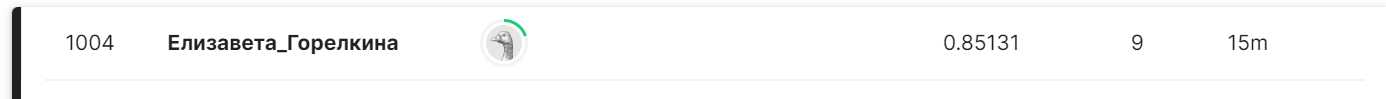

Скор: 0.85131

Ник: Елизавета_Горелкина